## Part I - Obama-Clinton Case Study

## Prepearing and loading data

__Target attributes__

In [1]:
elect.df  <- read.csv('Obama.csv')

In [2]:
summary(elect.df)

        County         State            Region          FIPS      
 Washington:  30   TX     : 251   Midwest  : 814   Min.   : 1001  
 Franklin  :  25   GA     : 159   Northeast: 217   1st Qu.:18102  
 Jefferson :  25   VA     : 134   South    :1419   Median :30110  
 Lincoln   :  23   KY     : 120   West     : 418   Mean   :31029  
 Jackson   :  22   MO     : 115                    3rd Qu.:46124  
 Madison   :  20   IL     : 102                    Max.   :56045  
 (Other)   :2723   (Other):1987                                   
    ElectionDate    ElectionType    TotalVote          Clinton      
 2/5/2008 :1128   Caucuses: 310   Min.   :     13   Min.   :     4  
 3/4/2008 : 358   Primary :2558   1st Qu.:    732   1st Qu.:   329  
 2/9/2008 : 196                   Median :   2330   Median :  1106  
 5/6/2008 : 192                   Mean   :  12864   Mean   :  5974  
 2/12/2008: 158                   3rd Qu.:   6418   3rd Qu.:  3200  
 5/20/2008: 156                   Max.   :1413869 

In [3]:
dim(elect.df)

[1] 2868   41

In [4]:
elect.df$ObamaMarginRate <-  (elect.df$Obama - elect.df$Clinton) *100 / elect.df$TotalVote

elect.df$ObamaRate <- 100 * elect.df$Obama / elect.df$TotalVote

elect.df$ClintonRate <- 100 * elect.df$Clinton / elect.df$TotalVote

dim(elect.df)

[1] 2868   44

In [5]:
head(elect.df)

County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,⋯,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaMarginRate,ObamaRate,ClintonRate
Adair,IA,Midwest,19001,1/3/2008,Caucuses,75,22,24,96.7,⋯,1145,75.0,66.0,7714,13.5,570,373,2.666667,32.00000,29.33333
Adams,IA,Midwest,19003,1/3/2008,Caucuses,50,18,7,96.8,⋯,1829,74.7,65.4,4192,9.9,425,238,-22.000000,14.00000,36.00000
Allamakee,IA,Midwest,19005,1/3/2008,Caucuses,80,25,33,104.5,⋯,1265,76.4,64.1,14796,23.1,659,326,10.000000,41.25000,31.25000
Appanoose,IA,Midwest,19007,1/3/2008,Caucuses,60,17,10,94.0,⋯,3315,74.0,60.2,13422,27.0,516,236,-11.666667,16.66667,28.33333
Audubon,IA,Midwest,19009,1/3/2008,Caucuses,48,16,17,94.7,⋯,1223,79.2,70.4,6278,14.2,444,261,2.083333,35.41667,33.33333
Benton,IA,Midwest,19011,1/3/2008,Caucuses,80,23,23,98.4,⋯,996,79.4,60.8,26962,37.6,718,401,0.000000,28.75000,28.75000


In [6]:
summary(elect.df$ObamaMarginRate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-80.930 -24.470  -1.977  -3.733  18.100  72.610    1131 

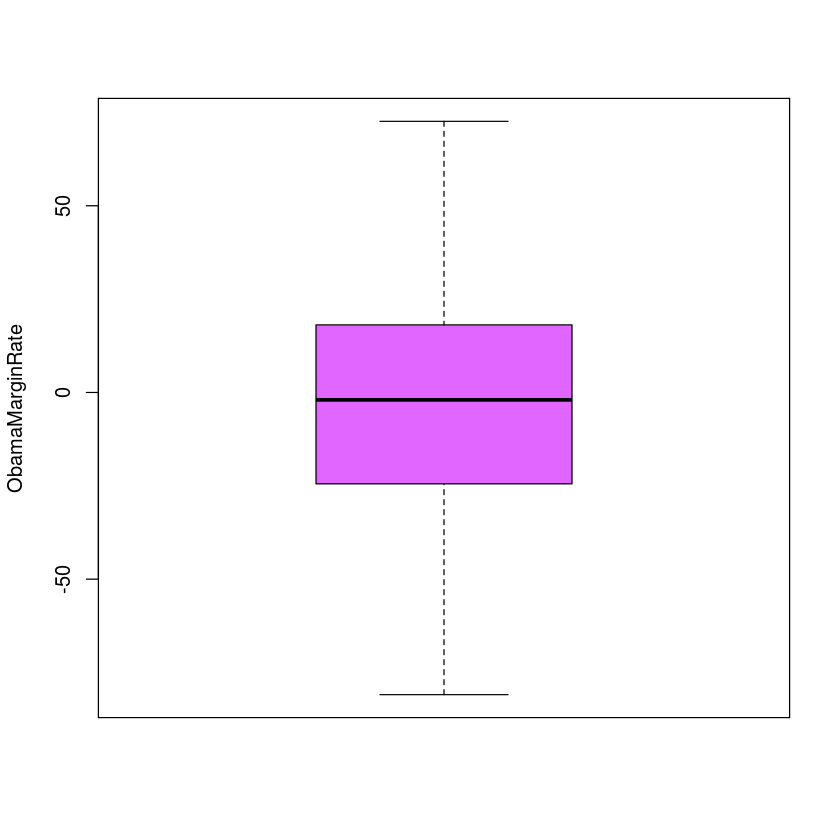

In [7]:
boxplot(elect.df$ObamaMarginRate, outline = F, ylab = "ObamaMarginRate", col= c("mediumorchid1"))

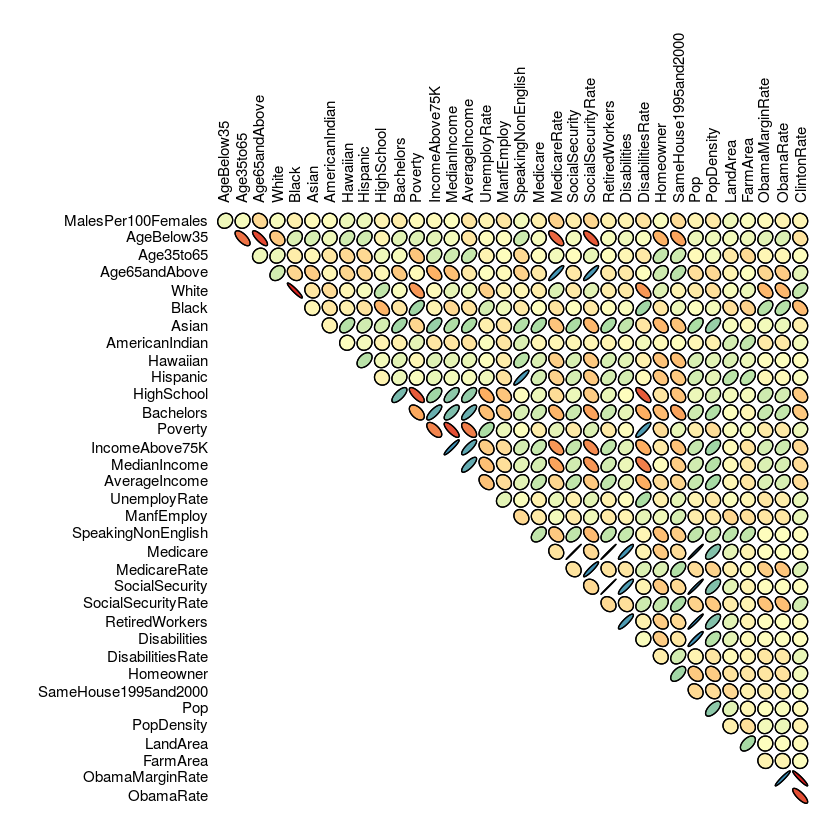

In [8]:
# Libraries
library(ellipse)            # first run install.packages('ellipse') if needed
library(RColorBrewer)       # first run install.packages('RColorBrewer') if needed

data=cor(elect.df[,c(10:44)],use="complete.obs")
 
# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors=colorRampPalette(my_colors)(100)
 

plotcorr(data , col=my_colors[data*50+50], mar = c(0,0,0,0),cex.lab=0.75 , type = "upper" , diag=FALSE)

In [9]:
CorMtrix <-cor(dplyr::select_if(elect.df, is.numeric))
round(CorMtrix, 2)



,FIPS,TotalVote,Clinton,Obama,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,⋯,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaMarginRate,ObamaRate,ClintonRate
FIPS,1.00,NA,NA,NA,-0.02,-0.08,0.03,0.08,0.12,NA,⋯,NA,NA,NA,-0.07,0.02,NA,NA,NA,NA,NA
TotalVote,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Clinton,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Obama,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MalesPer100Females,-0.02,NA,NA,NA,1.00,0.10,0.05,-0.18,0.07,NA,⋯,NA,NA,NA,-0.06,-0.07,NA,NA,NA,NA,NA
AgeBelow35,-0.08,NA,NA,NA,0.10,1.00,-0.72,-0.79,-0.34,NA,⋯,NA,NA,NA,0.15,0.06,NA,NA,NA,NA,NA
Age35to65,0.03,NA,NA,NA,0.05,-0.72,1.00,0.15,0.23,NA,⋯,NA,NA,NA,-0.02,0.00,NA,NA,NA,NA,NA
Age65andAbove,0.08,NA,NA,NA,-0.18,-0.79,0.15,1.00,0.29,NA,⋯,NA,NA,NA,-0.19,-0.08,NA,NA,NA,NA,NA
White,0.12,NA,NA,NA,0.07,-0.34,0.23,0.29,1.00,NA,⋯,NA,NA,NA,-0.13,-0.13,NA,NA,NA,NA,NA
Black,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [10]:
cor1 <-cor(elect.df[,c(10:30)])
round(cor1, 2)

,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,⋯,Bachelors,Poverty,IncomeAbove75K,MedianIncome,AverageIncome,UnemployRate,ManfEmploy,SpeakingNonEnglish,Medicare,MedicareRate
MalesPer100Females,1.00,0.10,0.05,-0.18,0.07,NA,NA,NA,-0.02,0.13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AgeBelow35,0.10,1.00,-0.72,-0.79,-0.34,NA,NA,NA,-0.07,0.27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Age35to65,0.05,-0.72,1.00,0.15,0.23,NA,NA,NA,0.15,-0.26,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Age65andAbove,-0.18,-0.79,0.15,1.00,0.29,NA,NA,NA,-0.04,-0.16,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
White,0.07,-0.34,0.23,0.29,1.00,NA,NA,NA,-0.10,0.08,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Black,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Asian,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AmericanIndian,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Hawaiian,-0.02,-0.07,0.15,-0.04,-0.10,NA,NA,NA,1.00,0.07,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Hispanic,0.13,0.27,-0.26,-0.16,0.08,NA,NA,NA,0.07,1.00,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


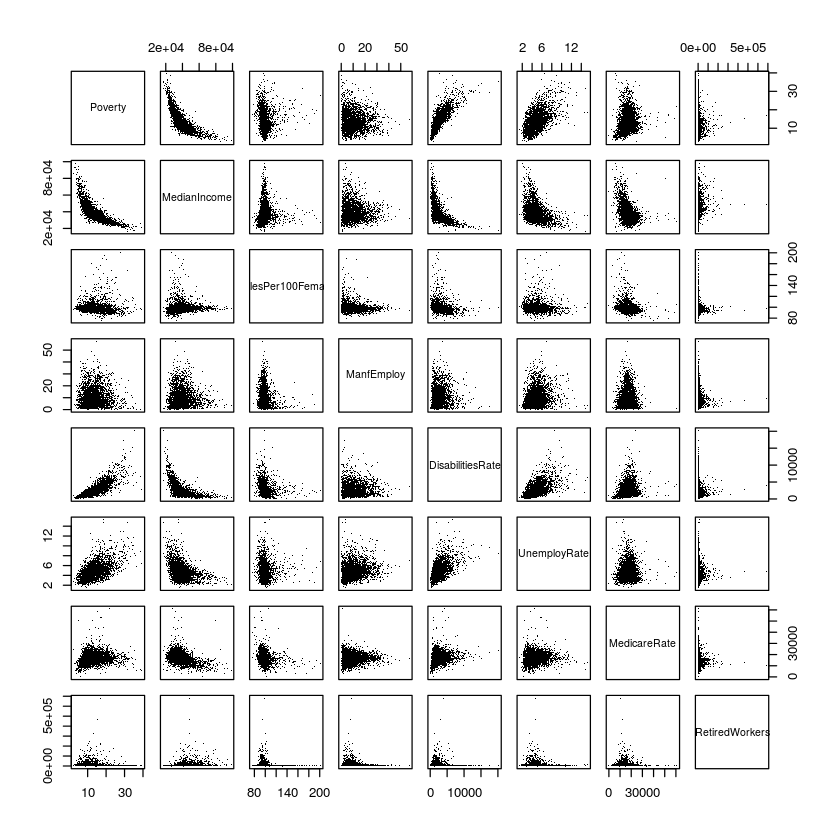

In [11]:
pairs(~ Poverty+
           MedianIncome + MalesPer100Females+ ManfEmploy + DisabilitiesRate + UnemployRate+ MedicareRate+ RetiredWorkers,
      data = elect.df, 
      pch=".")

In [12]:
install.packages("corrplot")
library(corrplot)



Warning message in install.packages("corrplot"):
“'lib = "/usr/lib64/microsoft-r/3.3/lib64/R/library"' is not writable”

ERROR: Error in install.packages("corrplot"): unable to install packages


In [13]:
corrplot(corr, method="circle")


corrplot(CorMtrix, method="circle")

ERROR: Error in eval(expr, envir, enclos): could not find function "corrplot"


__Looking at how ObamaMargin rate changes with region__

Warning message:
“Removed 1131 rows containing non-finite values (stat_boxplot).”

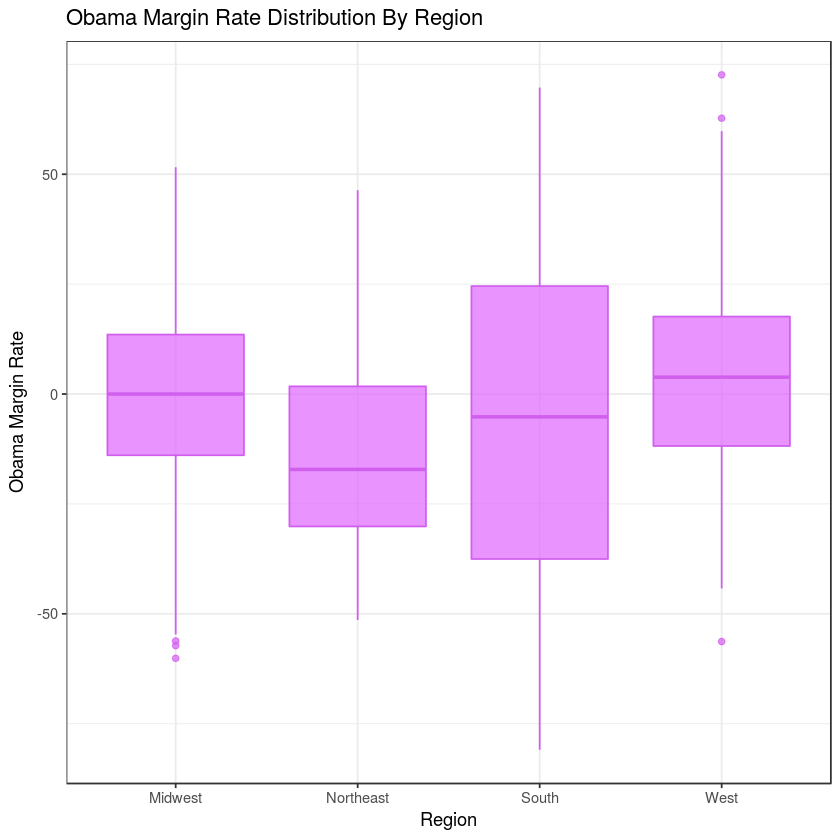

In [14]:
library(datasets)
library(ggplot2)

fill <- "mediumorchid1"
line <- "mediumorchid2"

Plot1 <- ggplot(elect.df, aes(x = Region, y = ObamaMarginRate)) +
        geom_boxplot(fill = fill, colour = line, alpha = 0.7)
Plot1 <- Plot1 + scale_x_discrete(name = "Region") +
        scale_y_continuous(name = "Obama Margin Rate")
Plot1 <- Plot1 + ggtitle("Obama Margin Rate Distribution By Region")

Plot1 <- Plot1 + theme_bw()
Plot1

__Relation between... __

In [15]:
elect.dfNE <- elect.df[elect.df$Region == "Northeast",]
elect.dfMW <- elect.df[elect.df$Region == "Midwest",]


In [16]:
library(gridExtra )

In [ ]:
Plot2 <- ggplot(elect.dfNE, aes(x = ObamaMarginRate, y = MedianIncome)) +
        geom_point() + geom_smooth(method=lm) + theme_minimal() + scale_color_gradient(low = "#0091ff", high = "#f0650e")
Plot2 <- Plot2 + ggtitle("Northeast")



# Shows that genrally wealthier people will vote for obama.

In [ ]:
Plot3 <- ggplot(elect.dfMW, aes(x = ObamaMarginRate, y = MedianIncome)) +
        geom_point() + geom_smooth(method=lm) + theme_minimal() + scale_color_gradient(low = "#0091ff", high = "#f0650e")
Plot3 <- Plot3 + ggtitle("Midwest")

grid.arrange(Plot2, Plot3, nrow = 1)

## Prepearing data set

__Dealing with missing values__

In [ ]:
# Allows us to identify the NA values, of course there will be missing vote data, as some counties are yet to vote.

countNAs <- function (v) sum(ifelse(is.na(v),1,0))

elect.countNAs <- sapply(elect.df, countNAs) 

elect.countNAs[elect.countNAs != 0]

In [ ]:
summary(elect.df$ManfEmploy)
cor(elect.df$ManfEmploy, elect.df$UnemployRate)

In [ ]:
# Imputing missing values:

# Missing values for AverageIncome are replaced by the 
# MedianIncome for that same record

elect.df$AverageIncome <- ifelse(is.na(elect.df$AverageIncome), 
                                 elect.df$MedianIncome, 
                                 elect.df$AverageIncome)

# Missing values for the following list of attributes 
# are replaced by 0.
     
for (attr in c("Black","Asian","AmericanIndian","ManfEmploy",
               "Disabilities","DisabilitiesRate","FarmArea"))
    {elect.df[[attr]] <- ifelse(is.na(elect.df[[attr]]), 
                                 0, 
                                 elect.df[[attr]])}

# There still remain several attributes with 1 or 2 missing values. 
# It turns out that all these final missing values are in 2 records.
# The following codes removes these records entirely.

elect.df <- elect.df[is.na(elect.df$HighSchool)==FALSE,]
elect.df <- elect.df[is.na(elect.df$Poverty)==FALSE,]

__Creating Train and test Data__

In [44]:
# Coverts date variable into an actual date format
elect.df$ElectionDate <- as.Date(elect.df$ElectionDate, 
                                 format="%m/%d/%Y")

In [45]:
#Creates Known and unknown dates for votes
elect.df.known <- elect.df[elect.df$ElectionDate < 
                           as.Date("2/19/2008", format = "%m/%d/%Y"), ]

elect.df.unknown <- elect.df[elect.df$ElectionDate >= 
                             as.Date("2/19/2008", format = "%m/%d/%Y"), ]


In [46]:
# We can now see now many rows there are in our known 
# and unknown datasets

nrow(elect.df.known)
nrow(elect.df.unknown)

[1] 1737

[1] 1131

In [47]:
# Find the number of rows in the known dataset
nKnown <- nrow(elect.df.known)

# Set the seed for a random sample
set.seed(201)

# Randomly sample 75% of the row indices in the known dataset
rowIndicesTrain <- sample(1:nKnown,
                          size = round(nKnown*0.75),
                          replace = FALSE)

In [48]:
# Split the training set into the training set and the test set using these indices. 

elect.df.training <- elect.df.known[rowIndicesTrain, ]

elect.df.test <- elect.df.known[-rowIndicesTrain, ]

## Prediction models for problem

__Linear Regression Model__

In [15]:
lmall <- lm(ObamaMarginRate ~ MalesPer100Females+AgeBelow35+Age35to65+Age65andAbove+
         White+Black+Asian+AmericanIndian+Hawaiian+Hispanic+HighSchool+Bachelors+Poverty+IncomeAbove75K+
         MedianIncome+AverageIncome+UnemployRate+ManfEmploy+SpeakingNonEnglish+Medicare+MedicareRate+
         SocialSecurity+SocialSecurityRate+RetiredWorkers+Disabilities+DisabilitiesRate+Homeowner+
         SameHouse1995and2000+Pop+PopDensity+LandArea+FarmArea, data = elect.df.training)
summary(lmall)

ERROR: Error in is.data.frame(data): object 'elect.df.training' not found


In [16]:
lmall.pred <- predict(lmall, elect.df.test)

genError(lmall.pred, elect.df.test$ObamaMarginRate)

ERROR: Error in predict(lmall, elect.df.test): object 'lmall' not found


In [17]:
# To identify what attributes are relveant in predicting the Obama rate margin, we first looked at the correlation between
# predictor variables, we then removed the variables that were strongly positively correlated as these impact the model when you
# put two varaibles that do the same thing. For example, we removed disabillities, which was the count, and only kept the rate,
# as this was more relvant
lm1 <- lm(ObamaMarginRate ~ MalesPer100Females+AgeBelow35+Age35to65+
           White+Black+Asian+AmericanIndian+
            Hawaiian+Hispanic+Poverty+
           MedianIncome+
            UnemployRate+
           MedicareRate+
            RetiredWorkers+
            DisabilitiesRate+Homeowner+
            Pop+PopDensity+LandArea, 
         data = elect.df.training)

summary(lm1)

# Intitately, the output of the linear regression model showed some issues, or one, we knew that median income is positively 
# correlated with the obama margin rate this is because bachelors and high school was highly correlated thus this influenced 
# the output of the model.
# Also removed Manfemploy as it was correlated with median income. Socialsecurityrate was correlated with disabillity rate thus
# and median income thus we removed.

ERROR: Error in is.data.frame(data): object 'elect.df.training' not found


In [18]:
# first set library path to include the following directory 
# if running on Azure LinuxDataScience VM ...

.libPaths('/home/vmuser/R/x86_64-pc-linux-gnu-library/3.2')

In [19]:
# The Metrics package includes the mae and rmse functions.
# Install Metrics if needed..
# install.packages("Metrics")  
install.packages("Metrics")
library(Metrics)

genError <- function(prediction, actual) 
    cat('MAE =', signif(mae(actual,prediction),4), 
        ' RMSE =', signif(rmse(actual,prediction),4), "\n")

Installing package into ‘/home/vmuser/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)
Warning message in install.packages("Metrics"):
“'lib = "/home/vmuser/R/x86_64-pc-linux-gnu-library/3.2"' is not writable”

ERROR: Error in install.packages("Metrics"): unable to install packages


In [20]:
lm1.pred <- predict(lm1, elect.df.test)

genError(lm1.pred, elect.df.test$ObamaMarginRate)

ERROR: Error in predict(lm1, elect.df.test): object 'lm1' not found


In [21]:
lm.step.backward <- step(lmall, direction = "backward")

ERROR: Error in terms(object): object 'lmall' not found


In [22]:
summary(lm.step.backward)

ERROR: Error in summary(lm.step.backward): object 'lm.step.backward' not found


In [23]:
lm.step.backward.pred <- predict(lm.step.backward, elect.df.test)

genError(lm.step.backward.pred, elect.df.test$ObamaMarginRate)

ERROR: Error in predict(lm.step.backward, elect.df.test): object 'lm.step.backward' not found


In [24]:
lm.min <- lm(ObamaMarginRate ~ 1, 
         data = elect.df.training)

lm.step.forward <- step(lm.min, 
                        direction='forward', 
                        scope=ObamaMarginRate ~ MalesPer100Females+AgeBelow35+Age35to65+Age65andAbove+
         White+Black+Asian+AmericanIndian+Hawaiian+Hispanic+HighSchool+Bachelors+Poverty+IncomeAbove75K+
         MedianIncome+UnemployRate+ManfEmploy+SpeakingNonEnglish+Medicare+MedicareRate+
         SocialSecurity+SocialSecurityRate+RetiredWorkers+Disabilities+DisabilitiesRate+Homeowner+
         SameHouse1995and2000+Pop+PopDensity+LandArea+FarmArea)

ERROR: Error in is.data.frame(data): object 'elect.df.training' not found


In [25]:
summary(lm.step.forward)

ERROR: Error in summary(lm.step.forward): object 'lm.step.forward' not found


In [26]:
lm.step.forward.pred <- predict(lm.step.forward, elect.df.test)

genError(lm.step.forward.pred, elect.df.test$ObamaMarginRate)

ERROR: Error in predict(lm.step.forward, elect.df.test): object 'lm.step.forward' not found


__Regression Trees__

In [27]:
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)    # install.packages("rpart.plot") is needed

Installing package into ‘/home/vmuser/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)
Warning message in install.packages("rpart.plot"):
“'lib = "/home/vmuser/R/x86_64-pc-linux-gnu-library/3.2"' is not writable”

ERROR: Error in install.packages("rpart.plot"): unable to install packages


In [28]:
rt <- rpart(ObamaMarginRate ~ MalesPer100Females+AgeBelow35+Age35to65+
           White+Black+Asian+AmericanIndian+ Hawaiian+Hispanic+Poverty+ MedianIncome+ UnemployRate+MedicareRate+RetiredWorkers+
            DisabilitiesRate+Homeowner+ Pop+PopDensity+LandArea, 
            data = elect.df.training, cp = 0.001)  # Fits a regression tree.


ERROR: Error in is.data.frame(data): object 'elect.df.training' not found


In [29]:
rt.pred <- predict(rt, elect.df.test)

genError(rt.pred, elect.df.test$ObamaMarginRate)

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "function"


In [30]:
plotcp(rt,upper = "splits")

ERROR: Error in plotcp(rt, upper = "splits"): Not a legitimate "rpart" object


In [31]:
rt.opt <- prune(rt, cp=0.00855)
prp(rt.opt, type = 1, extra = 1)  

ERROR: Error in UseMethod("prune"): no applicable method for 'prune' applied to an object of class "function"


In [32]:
rt.opt.pred <- predict(rt.opt, elect.df.test)

genError(rt.opt.pred, elect.df.test$ObamaMarginRate)

ERROR: Error in predict(rt.opt, elect.df.test): object 'rt.opt' not found


__Lasso Model__

In [63]:
startCol <- which(names(elect.df)=="MalesPer100Females") 
endCol <- which(names(elect.df)=="FarmArea")

xknown <- as.matrix(elect.df.known[, startCol:endCol]) 

yknown <- elect.df.known$ObamaRateMargin

In [64]:
library(glmnet)

lm.lasso <- glmnet(xknown, yknown, family = "gaussian")

ERROR: Error in glmnet(xknown, yknown, family = "gaussian"): number of observations in y (0) not equal to the number of rows of x (1737)


In [53]:
plot(lm.lasso, xvar = "lambda", label = TRUE)  


ERROR: Error in plot(lm.lasso, xvar = "lambda", label = TRUE): object 'lm.lasso' not found


In [61]:
coef(lm.lasso, s = exp(0))

ERROR: Error in coef(lm.lasso, s = exp(0)): object 'lm.lasso' not found


In [62]:
set.seed(101)

lm.lasso.cv <- cv.glmnet(xknown, yknown, nfolds = 5, family = "gaussian") 

ERROR: Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : NA/NaN/Inf in foreign function call (arg 5)


In [ ]:
lm.lasso.cv$lambda.min
(minLogLambda <- log(lm.lasso.cv$lambda.min))

In [ ]:
coef(lm.lasso.cv, s = "lambda.min")  
# Coefficients of the regularized linear regression with an optimal lambda. 

In [ ]:
plot(lm.lasso, xvar = "lambda", label = TRUE)
abline(v = log(lm.lasso.cv$lambda.min))

In [ ]:
xtest <- as.matrix(elect.df.test[, startCol:endCol])

In [ ]:
lm.lasso.cv.pred <- predict(lm.lasso.cv, newx = xtest, s = "lambda.min")

genError(lm.lasso.cv.pred, elect.df.test$ObamaRateMargin)

__ Applying the Predictions__

In [ ]:
xunknown <- as.matrix(elect.df.unknown[, startCol:endCol])

unknown.pred <- predict(lm.lasso.cv, newx = xunknown, s = "lambda.min")

In [65]:
predictions.df <- elect.df.unknown 

predictions.df$PredictedObamaRate <- as.vector(unknown.pred)

write.csv(predictions.df, file="PredictedObamaMarginRate.csv")

ERROR: Error in as.vector(unknown.pred): object 'unknown.pred' not found


## Part II

## Loading and Prepearing Data Set

In [17]:
USBirths.df <- read.csv("US_Births.csv")

In [18]:
head(USBirths.df)

Yr_Mo,Live.Births
200701,354943
200702,326891
200703,360828
200704,338224
200705,362319
200706,358606


In [19]:
summary(USBirths.df)

     Yr_Mo         Live.Births    
 Min.   :200701   Min.   :299000  
 1st Qu.:200805   1st Qu.:327250  
 Median :200910   Median :344500  
 Mean   :200934   Mean   :342105  
 3rd Qu.:201102   3rd Qu.:354929  
 Max.   :201206   Max.   :390378  

In [20]:
# Code that splits the Month and Year colunm
library(tidyr)
USBirths.df <- extract(USBirths.df, Yr_Mo, into = c("Year", "Month"), "(.{4})(.{2})")


In [21]:
head(USBirths.df)

Year,Month,Live.Births
2007,01,354943
2007,02,326891
2007,03,360828
2007,04,338224
2007,05,362319
2007,06,358606


__Time Series Plot of US Births__

In [22]:
# Making the births variable a time series
LiveBirths.ts <- ts(USBirths.df$Live.Births, 
                start = c(2007, 01), 
                end = c(2012, 06), 
                freq = 12)

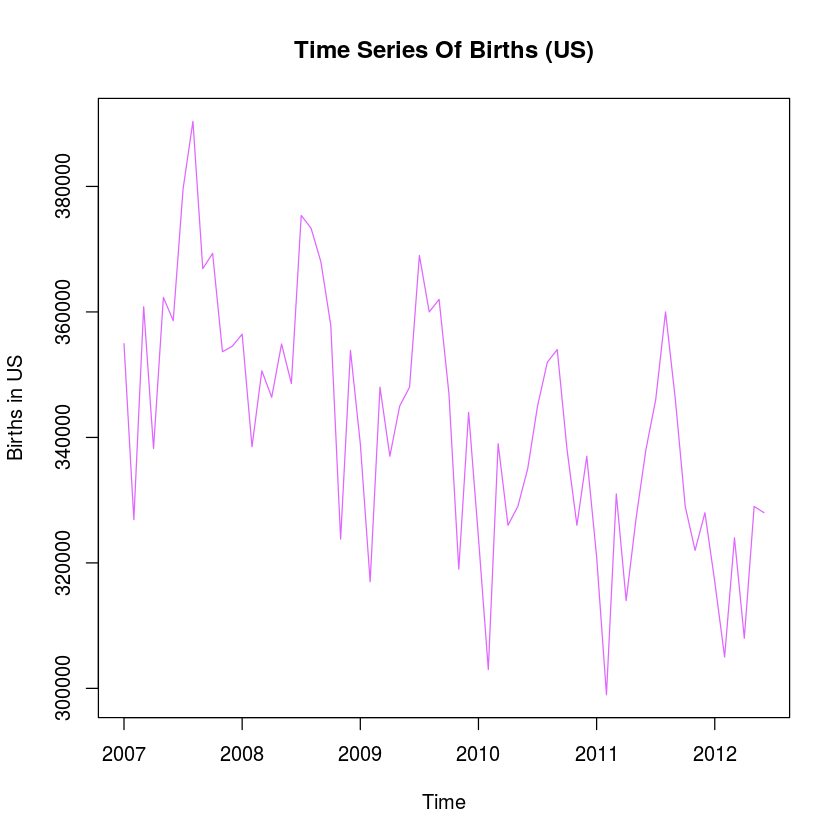

In [23]:
plot(LiveBirths.ts, ylab = "Births in US", col = "mediumorchid1", main ="Time Series Of Births (US)")

## Models

In [24]:
.libPaths("/usr/local/lib/R/site-library")
library("forecast")

In [25]:
rmse.ets <- function (etsmodel) cat("RMSE = ", sqrt(etsmodel$mse))


__ AAA Model__

In [26]:
(USBirths.ets.AAA <- ets(LiveBirths.ts, model = "AAA"))

ETS(A,A,A) 

Call:
 ets(y = LiveBirths.ts, model = "AAA") 

  Smoothing parameters:
    alpha = 0.1342 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 365057.0079 
    b = -557.8703 
    s=1815.176 -13310.1 5510.562 16085.76 23364.83 18724.14
           1333.278 -1820.319 -11570.28 -899.8827 -29211.26 -10021.9

  sigma:  5622.293

     AIC     AICc      BIC 
1450.271 1463.021 1487.495 

In [27]:
rmse.ets(USBirths.ets.AAA)

RMSE =  5622.293

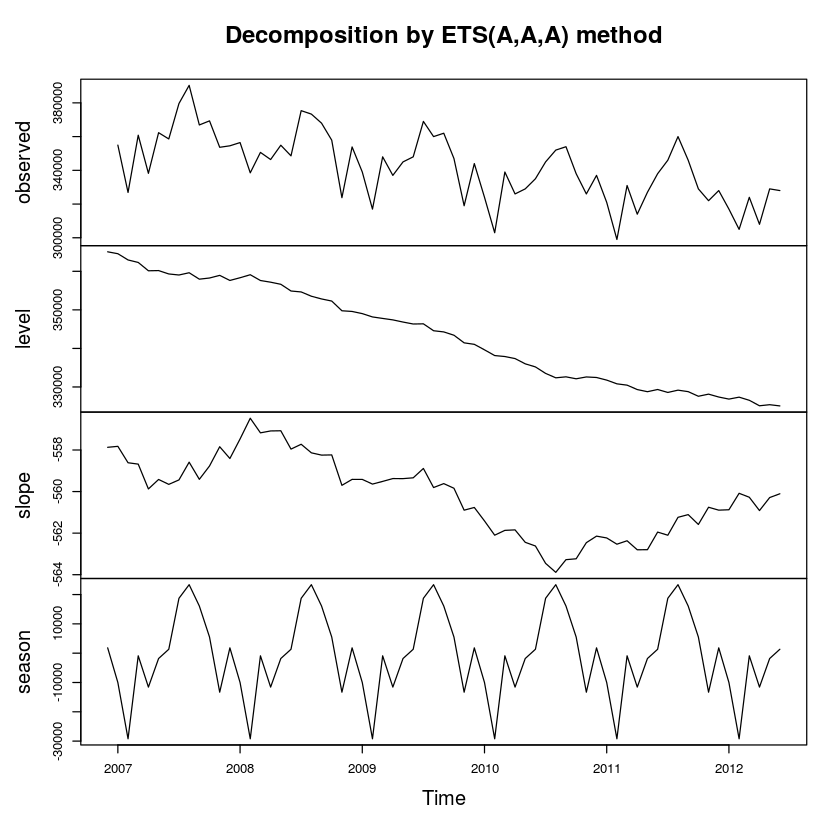

In [28]:
plot(USBirths.ets.AAA)

__AAN Model__

In [29]:
(USBirths.ets.AAN <- ets(LiveBirths.ts, model = "AAN"))
rmse.ets(USBirths.ets.AAN)

ETS(A,A,N) 

Call:
 ets(y = LiveBirths.ts, model = "AAN") 

  Smoothing parameters:
    alpha = 0.505 
    beta  = 1e-04 

  Initial states:
    l = 345984.1013 
    b = -103.612 

  sigma:  15584.28

     AIC     AICc      BIC 
1560.848 1561.848 1571.796 

RMSE =  15584.28

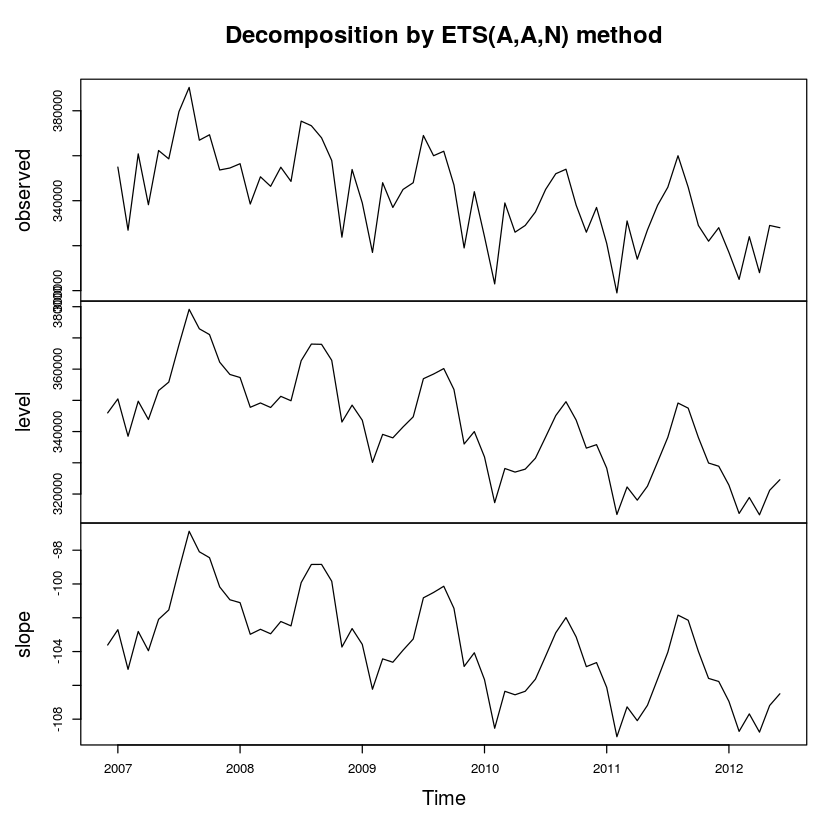

In [30]:
plot(USBirths.ets.AAN)
## The likely reason that the AAA model predicts alot better than the AAN model is because this dataset has both a downward trend
## and it is also seasonal. We see that the ends of the year are where more babies are born whilst the beginings tend to have 
## less births.

__ Predictions__

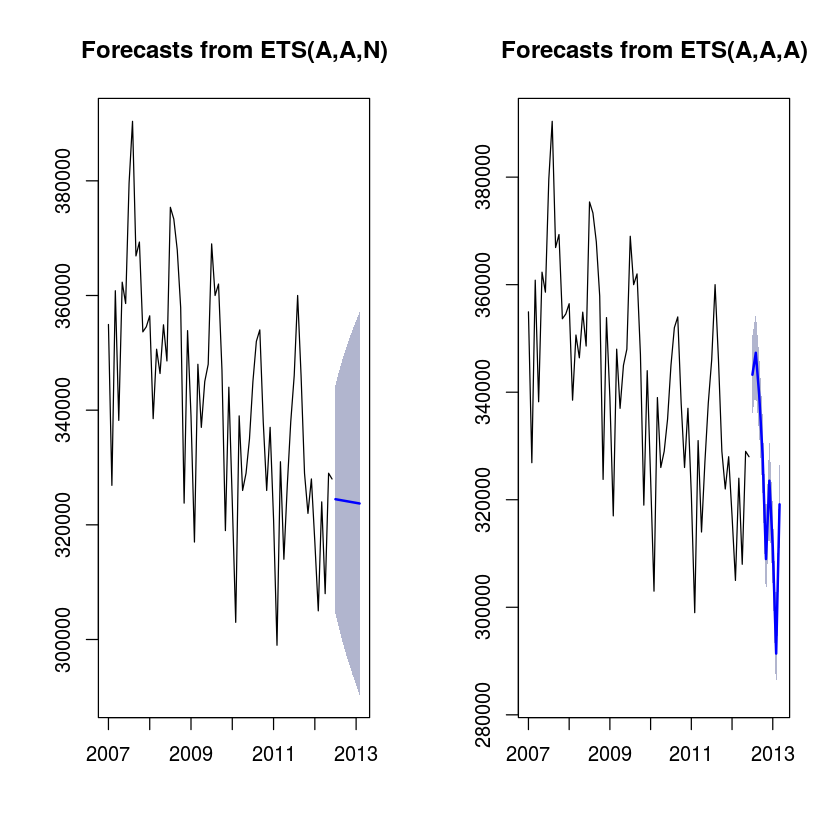

In [33]:
USBirths.ets.AAN.pred <- forecast(USBirths.ets.AAN, h = 8, level = 80)
USBirths.ets.AAA.pred <- forecast(USBirths.ets.AAA, h = 9, level = 80)

# plot the forecasts for the ANN and AAN models
par(mfrow = c(1, 2))
plot(USBirths.ets.AAN.pred)
plot(USBirths.ets.AAA.pred)

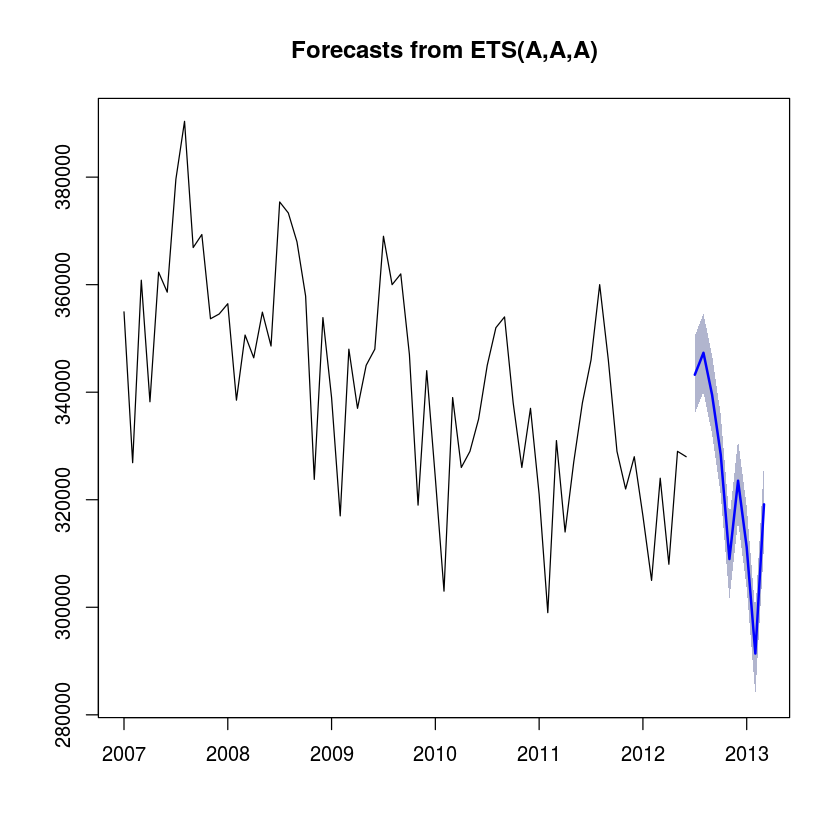

In [34]:
plot(USBirths.ets.AAA.pred)

In [182]:
USBirths.ets.AAN.pred$mean[8]
USBirths.ets.AAA.pred$mean[8]

[1] 323724.4

[1] 291394.2

## NICU VS US Births

__ Loading Data__

In [11]:
baby.df <- read.csv("NICU_A.csv")

In [12]:
n <- nrow(baby.df)
baby.df[c(1:4,(n-3):n),]

,Month,Year,Admits,ALOS
1,Jul,2007,44,NA
2,Aug,2007,42,NA
3,Sep,2007,43,NA
4,Oct,2007,47,NA
65,Nov,2012,41,34.4
66,Dec,2012,33,29.7
67,Jan,2013,33,25.2
68,Feb,2013,43,30.8


In [99]:
# Making the times match so we can easily compare the datasets, to identify any commmon trends or differences.
admits.ts <- ts(baby.df$Admits, 
                start = c(2007, 7), 
                end = c(2012, 6), 
                freq = 12)
LiveBirths.ts1 <- ts(USBirths.df$Live.Births, 
                start = c(2007, 07), 
                end = c(2012, 06), 
                freq = 12)

In [9]:
head(USBirths.df)

Yr_Mo,Live.Births
200701,354943
200702,326891
200703,360828
200704,338224
200705,362319
200706,358606


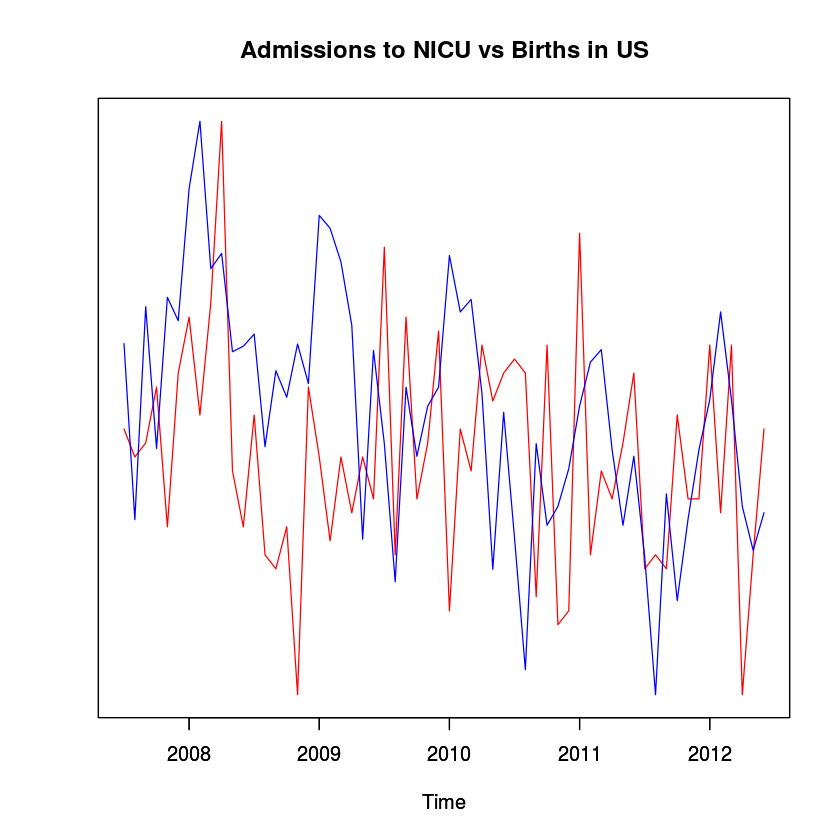

In [187]:
## Add legend

plot( admits.ts, type="l", col="red", ylab = NA,  yaxt='n')
par(new=TRUE)
plot( LiveBirths.ts1, type="l", col="blue", ylab = NA, yaxt='n', main = "Admissions to NICU vs Births in US")


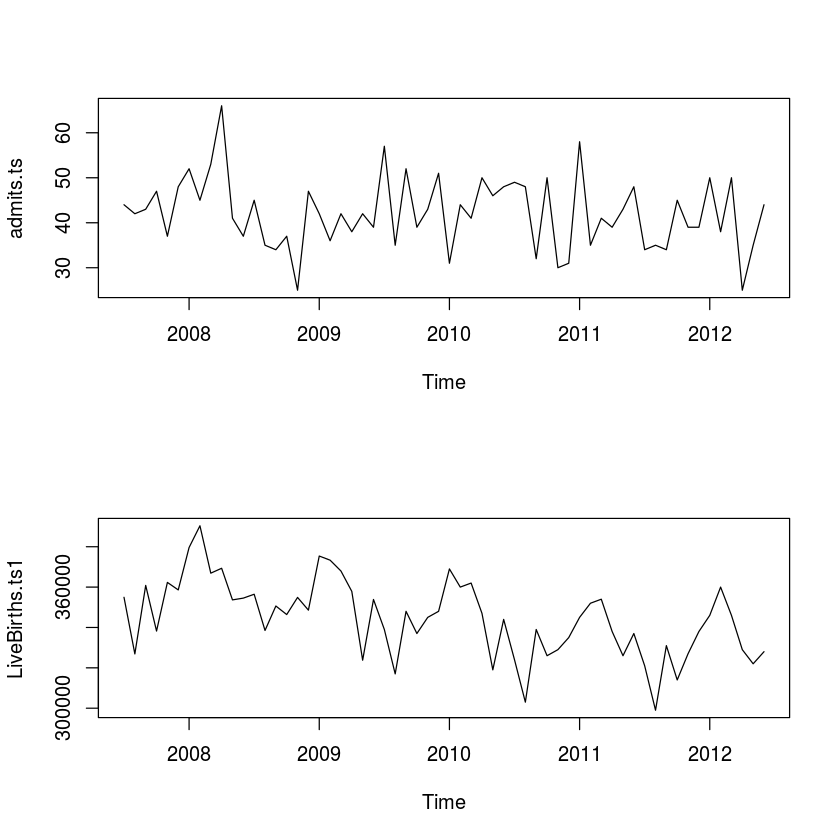

In [90]:
par(mfrow=c(2,1))
plot(admits.ts)
plot(LiveBirths.ts1)

In [92]:
alos.ts <- ts(baby.df$ALOS[-(1:12)],     # we need to remove first 12 data values, which do not have ALOS values
              start = c(2008,7), 
              end = c(2012,6), 
              freq = 12)
LiveBirths.ts2 <- ts(USBirths.df$Live.Births, 
                start = c(2008, 07), 
                end = c(2012, 06), 
                freq = 12)

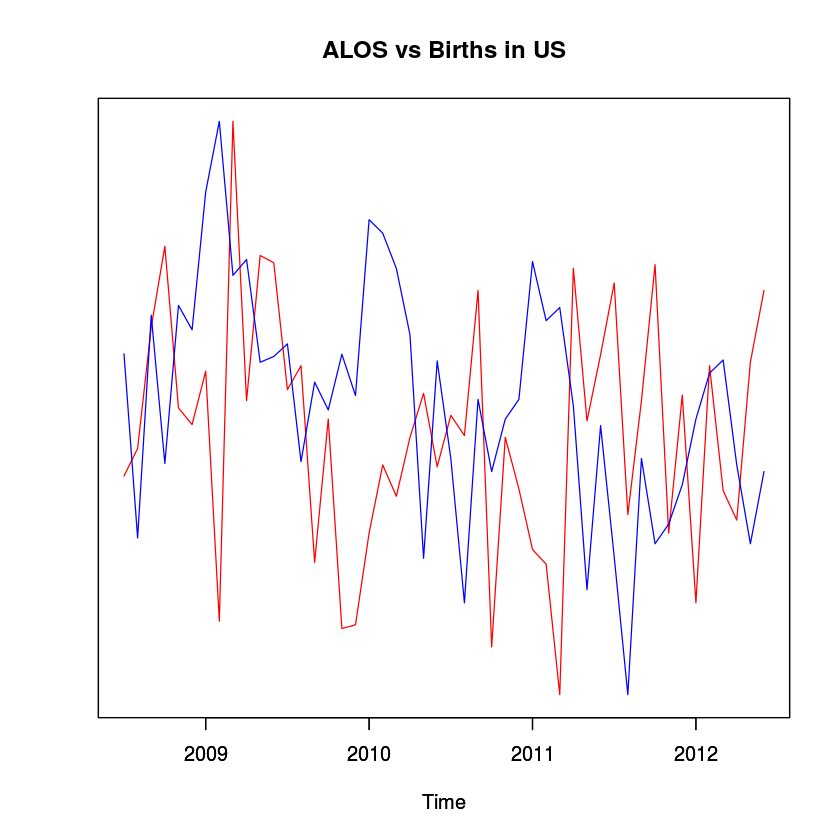

In [185]:
plot( alos.ts, type="l", col="red", ylab = NA,  yaxt='n')
par(new=TRUE)
plot( LiveBirths.ts2, type="l", col="blue", ylab = NA, yaxt='n', main = "ALOS vs Births in US")

In [193]:
admits.ts <- ts(baby.df$Admits, 
                start = c(2008, 7), 
                end = c(2011, 6), 
                freq = 12)
alos.ts <- ts(baby.df$ALOS[-(1:12)],     # we need to remove first 12 data values, which do not have ALOS values
              start = c(2008,7), 
              end = c(2011,6), 
              freq = 12)
LiveBirths.ts2 <- ts(USBirths.df$Live.Births, 
                start = c(2008, 07), 
                end = c(2011, 06), 
                freq = 12)


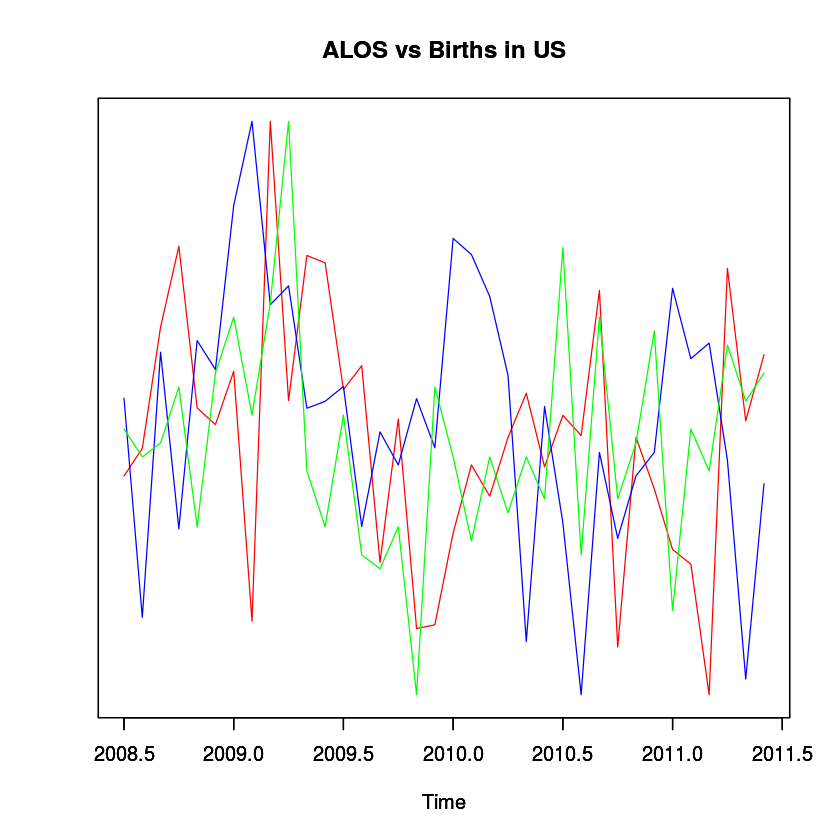

In [194]:
plot( alos.ts, type="l", col="red", ylab = NA,  yaxt='n')
par(new=TRUE)
plot( LiveBirths.ts2, type="l", col="blue", ylab = NA, yaxt='n', main = "ALOS vs Births in US")
par(new=TRUE)
plot( admits.ts, type="l", col="green", ylab = NA, yaxt='n', main = "ALOS vs Births in US")

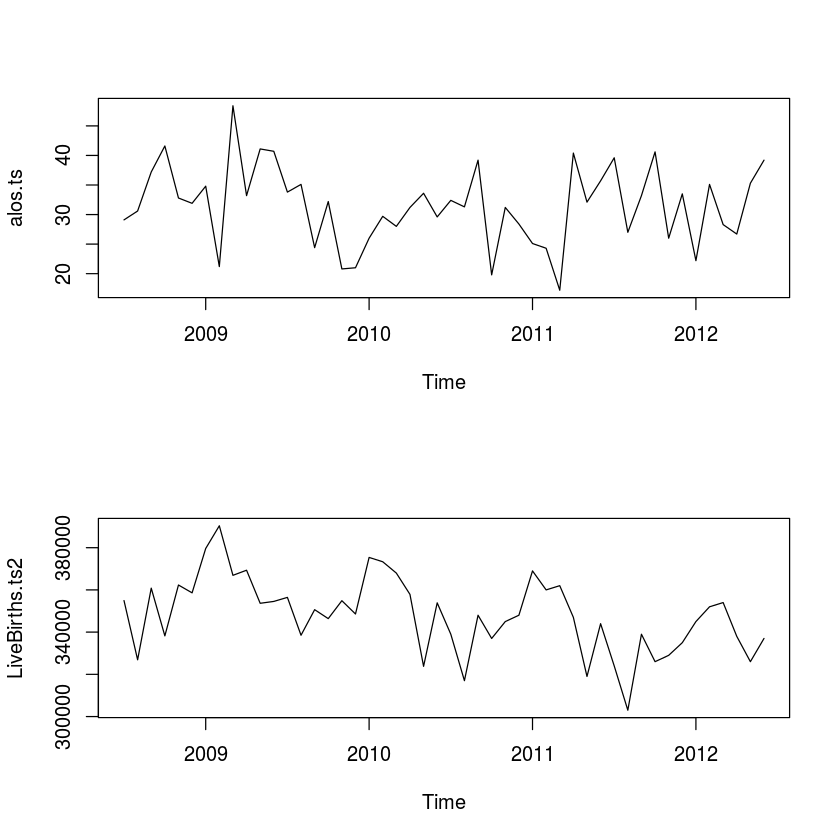

In [109]:
par(mfrow=c(2,1))
plot(alos.ts)
plot(LiveBirths.ts2)

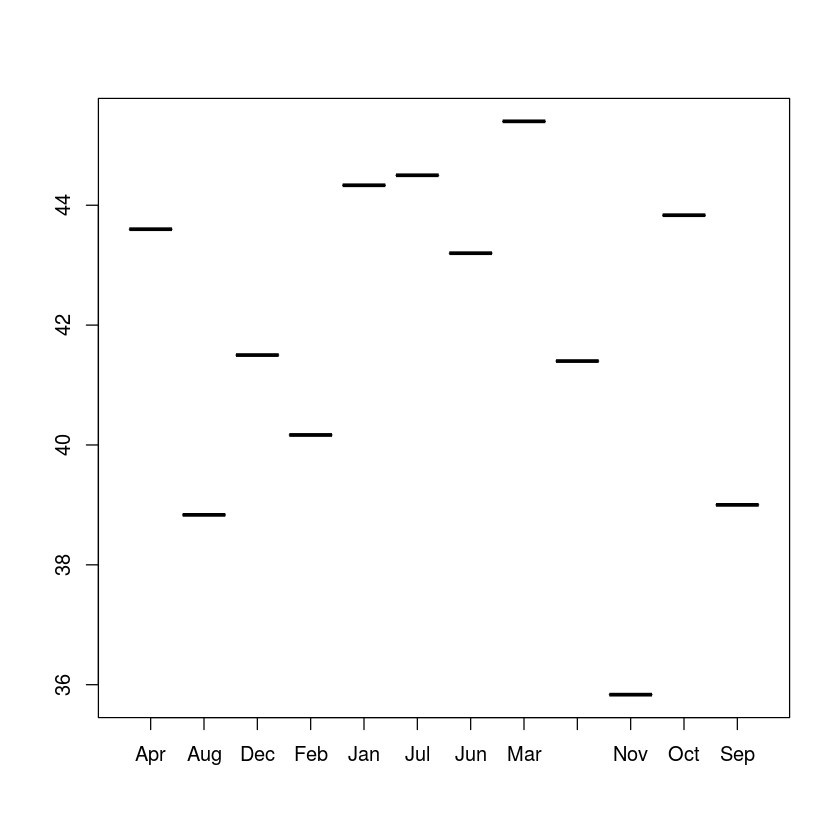

In [189]:
MeanMonthlyAdmits <- aggregate( Admits ~ Month ,baby.df, mean )
plot(MeanMonthlyAdmits$Month, MeanMonthlyAdmits$Admits)

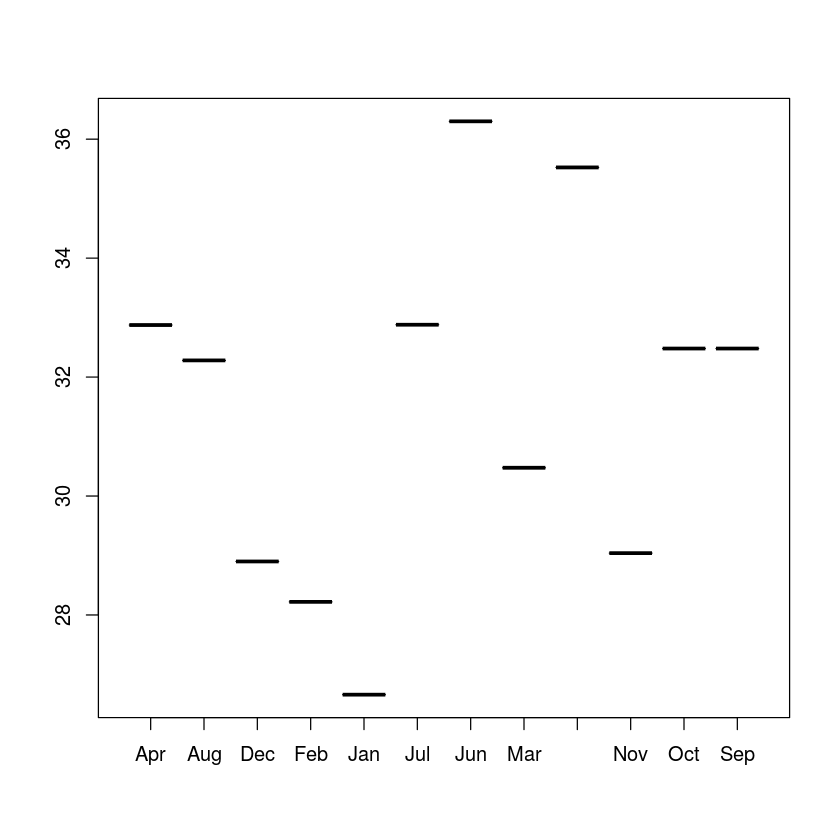

In [188]:
MeanMonthlyAlos <- aggregate( ALOS ~ Month ,baby.df, mean )
plot(MeanMonthlyAlos$Month, MeanMonthlyAlos$ALOS)

In [148]:
Monthlymeanbirths <- aggregate( Live.Births ~ Month , USBirths.df, mean )

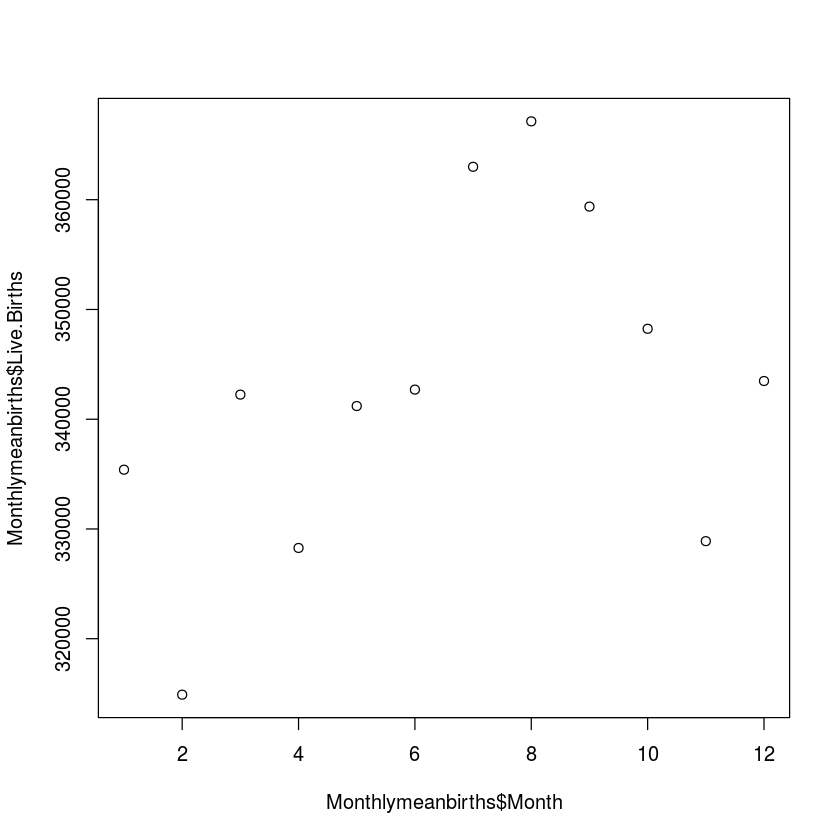

In [147]:
plot(Monthlymeanbirths$Month, Monthlymeanbirths$Live.Births)

## NCIU vs US Births

In [3]:
.libPaths("/usr/local/lib/R/site-library")

In [7]:
us.df <- read.csv("US_Births.csv")

nicuA.df <- read.csv("NICU_A.csv")

us.df$Date <- as.Date(paste(as.character(us.df$Yr_Mo),"1",sep=""), 
                              format="%Y%m%d")

nicuA.df$Date <- as.Date(paste(as.character(nicuA.df$Year), nicuA.df$Month,"1",sep=""), 
                                 format="%Y%b%d")
us.nicuA.df <- merge(us.df, nicuA.df, by="Date", all=TRUE)

In [8]:
us.nicuA.df[which(us.nicuA.df$Year==2012),]

,Date,Yr_Mo,Live.Births,Month,Year,Admits,ALOS
61,2012-01-01,201201,317000,Jan,2012,50,22.2
62,2012-02-01,201202,305000,Feb,2012,38,35.1
63,2012-03-01,201203,324000,Mar,2012,50,28.3
64,2012-04-01,201204,308000,Apr,2012,25,26.7
65,2012-05-01,201205,329000,May,2012,35,35.3
66,2012-06-01,201206,328000,Jun,2012,44,39.2
67,2012-07-01,NA,NA,Jul,2012,38,29.5
68,2012-08-01,NA,NA,Aug,2012,38,37.4
69,2012-09-01,NA,NA,Sep,2012,39,28.4
70,2012-10-01,NA,NA,Oct,2012,45,28.2


In [10]:
# This optional code uses the repr package to change the default size of plots 
library(repr)
options(repr.plot.width=9, repr.plot.height=4)  # change plot size to 7 x 5


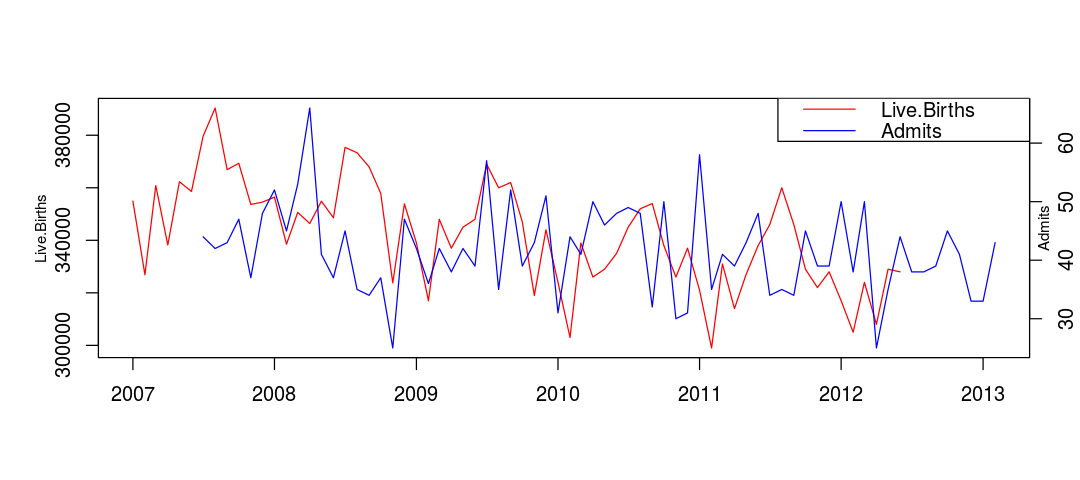

In [13]:
## Admits vs US Births
plot(us.nicuA.df$Date, us.nicuA.df$Live.Births, type="l", col="red", xlab=NA, ylab=NA)
par(new = T)
plot(us.nicuA.df$Date, us.nicuA.df$Admits, type="l", col="blue", axes=F, xlab=NA, ylab=NA)
axis(side = 4)
mtext(side = 4, line = 0, 'Admits', cex=0.75)
mtext(side = 2, line = 2, 'Live.Births', cex=0.75)
legend("topright",
       legend=c("Live.Births", "","Admits"),
       col=c("red", "white","blue"),lty=c(1,1,1))

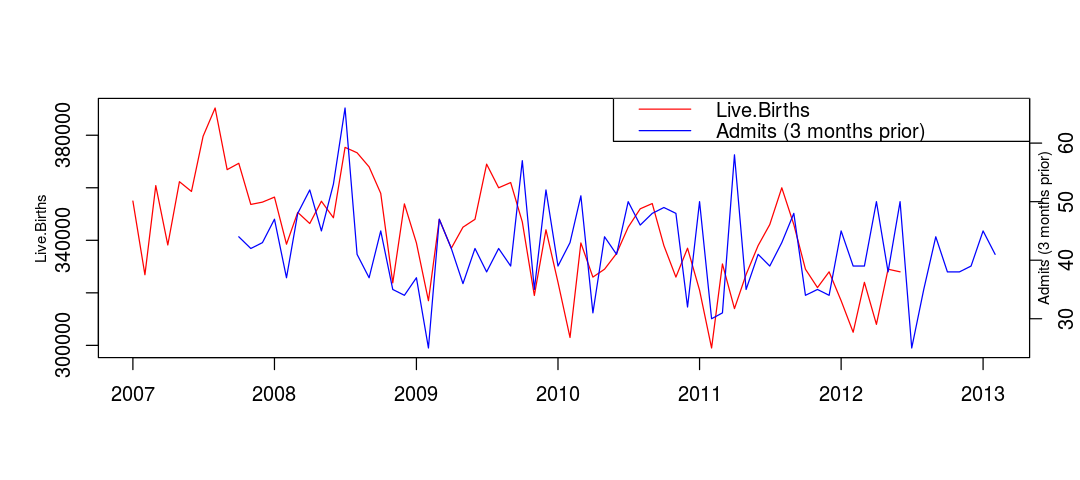

In [20]:
plot(us.nicuA.df$Date, us.nicuA.df$Live.Births, type="l", col="red", xlab=NA, ylab=NA)
par(new = T)
offset=3   # used to set the month offset for Admits - +3 means use the value from 3 months ago
plot(us.nicuA.df$Date, c(rep(NA,offset),head(us.nicuA.df$Admits, nrow(us.nicuA.df)-offset)), type="l", col="blue", axes=F, xlab=NA, ylab=NA)
axis(side = 4)
mtext(side = 4, line = 0, 'Admits (3 months prior)', cex=0.75)
mtext(side = 2, line = 2, 'Live.Births', cex=0.75)
legend("topright",
       legend=c("Live.Births", "","Admits (3 months prior)"),
       col=c("red", "white","blue"),lty=c(1,1,1))

In [25]:
for (offset in 0:4)
    cat("offset=",offset, ":  cor=", cor(us.nicuA.df$Live.Births, c(rep(NA,offset),head(us.nicuA.df$Admits, nrow(us.nicuA.df)-offset)), use="complete.obs"), "\n")


offset= 0 :  cor= 0.1648551 
offset= 1 :  cor= -0.003261741 
offset= 2 :  cor= 0.17084 
offset= 3 :  cor= 0.2756251 
offset= 4 :  cor= 0.1213486 


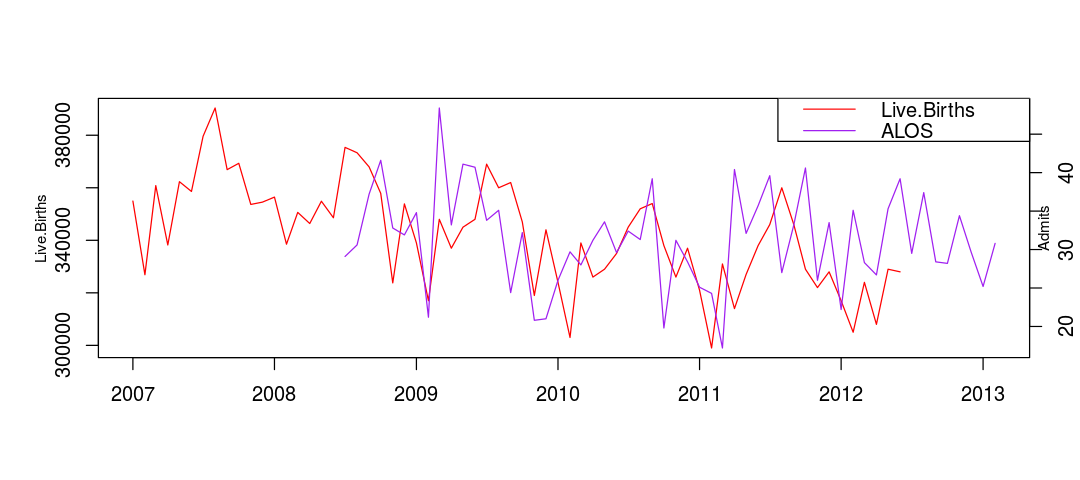

In [17]:
## ALOS vs US Births
plot(us.nicuA.df$Date, us.nicuA.df$Live.Births, type="l", col="red", xlab=NA, ylab=NA)
par(new = T)
plot(us.nicuA.df$Date, us.nicuA.df$ALOS, type="l", col="purple", axes=F, xlab=NA, ylab=NA)
axis(side = 4)
mtext(side = 4, line = 0, 'Admits', cex=0.75)
mtext(side = 2, line = 2, 'Live.Births', cex=0.75)
legend("topright",
       legend=c("Live.Births", "","ALOS"),
       col=c("red", "white","purple"),lty=c(1,1,1))

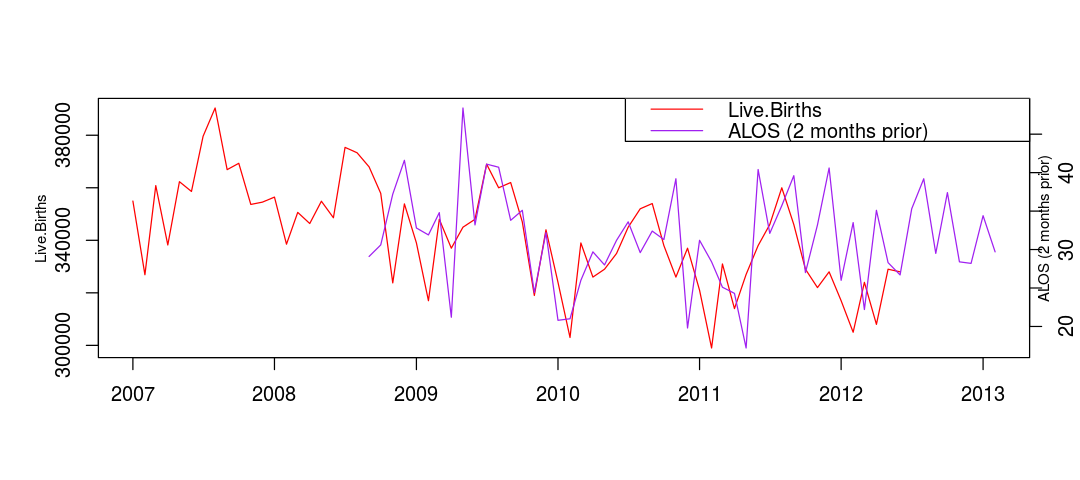

In [29]:
plot(us.nicuA.df$Date, us.nicuA.df$Live.Births, type="l", col="red", xlab=NA, ylab=NA)
par(new = T)
offset=2 # used to set the month offset for Admits - +3 means use the value from 3 months ago
plot(us.nicuA.df$Date, c(rep(NA,offset),head(us.nicuA.df$ALOS, nrow(us.nicuA.df)-offset)), type="l", col="purple", axes=F, xlab=NA, ylab=NA)
axis(side = 4)
mtext(side = 4, line = 0, 'ALOS (2 months prior)', cex=0.75)
mtext(side = 2, line = 2, 'Live.Births', cex=0.75)
legend("topright",
       legend=c("Live.Births", "","ALOS (2 months prior)"),
       col=c("red", "white","purple"),lty=c(1,1,1))

In [26]:
for (offset in 0:4)
    cat("offset=",offset, ":  cor=", cor(us.nicuA.df$Live.Births, c(rep(NA,offset),head(us.nicuA.df$ALOS, nrow(us.nicuA.df)-offset)), use="complete.obs"), "\n")


offset= 0 :  cor= 0.2680486 
offset= 1 :  cor= 0.285606 
offset= 2 :  cor= 0.4017454 
offset= 3 :  cor= 0.3555762 
offset= 4 :  cor= 0.2058799 


## Seasonaillity 

Warning message:
“Removed 6 rows containing missing values (geom_path).”

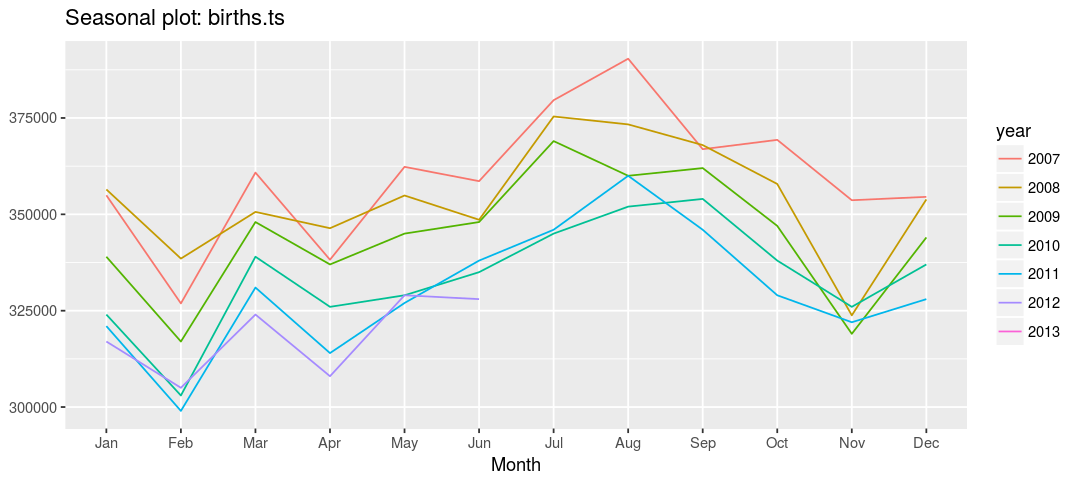

In [38]:
library(ggplot2) 
library(forecast)
births.ts <- ts(us.nicuA.df$Live.Births, start = c(2007, 1), freq = 12)

ggseasonplot(births.ts)


Warning message:
“Removed 6 rows containing missing values (geom_path).”

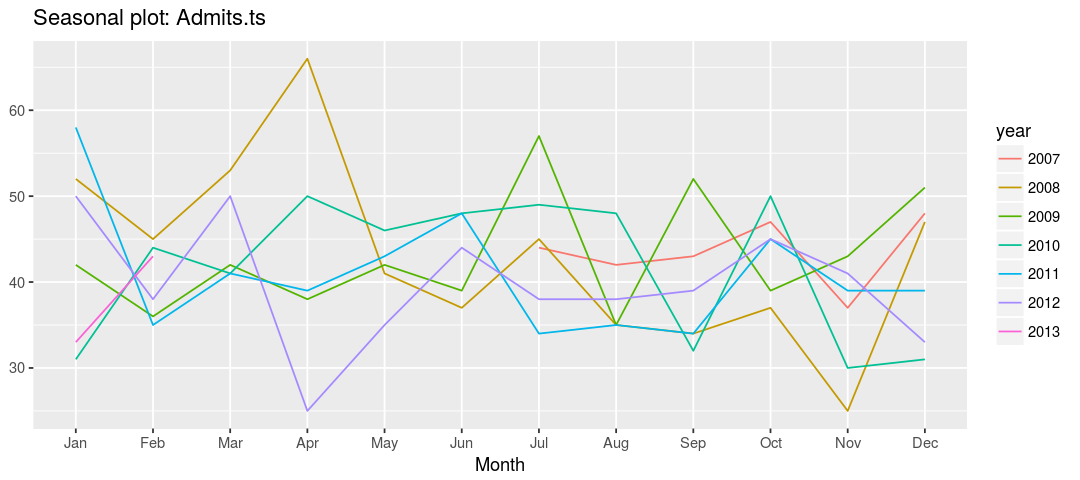

In [39]:
Admits.ts <- ts(us.nicuA.df$Admits, start = c(2007, 1), freq = 12)

ggseasonplot(Admits.ts)

In [45]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


In [48]:
## Seasonality Plots
par(mfrow=c(3,1))

Admits.ts <- ts(us.nicuA.df$Admits, start = c(2007, 1), freq = 12)

p1 <- ggseasonplot(Admits.ts)

births.ts <- ts(us.nicuA.df$Live.Births, start = c(2007, 1), freq = 12)

p2 <- ggseasonplot(births.ts)

ALOS.ts <- ts(us.nicuA.df$ALOS, start = c(2007, 1), freq = 12)

p3 <- ggseasonplot(ALOS.ts)

Warning message:
“Removed 6 rows containing missing values (geom_path).”Warning message:
“Removed 6 rows containing missing values (geom_path).”Warning message:
“Removed 6 rows containing missing values (geom_path).”

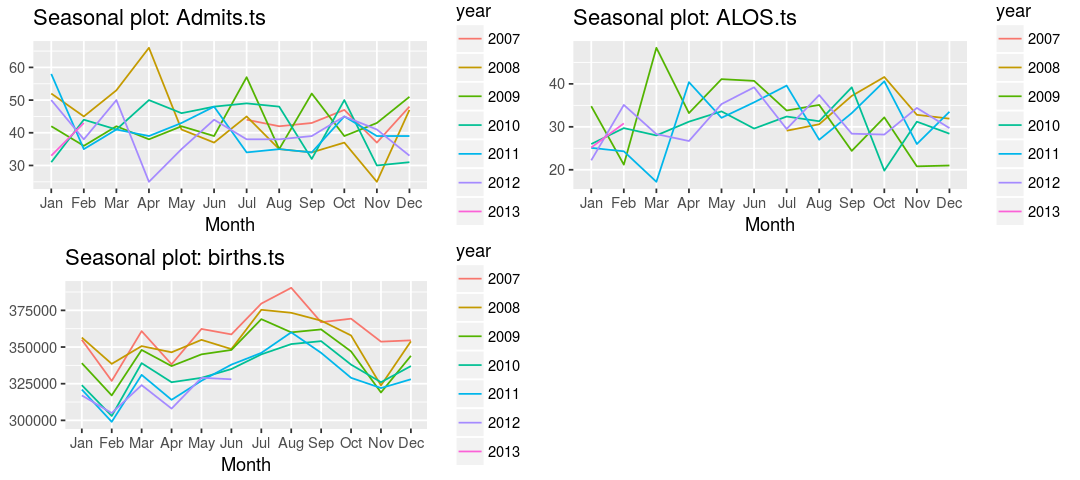

In [52]:
multiplot(p1, p2, p3, cols=2)